In [1]:
# beginning with importing important library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/kaggle/input/the-big-dataset-of-ultra-marathon-running/TWO_CENTURIES_OF_UM_RACES.csv")

/tmp/ipykernel_18/3197416782.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/the-big-dataset-of-ultra-marathon-running/TWO_CENTURIES_OF_UM_RACES.csv")


In [3]:
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


# Data Exploratory


In [4]:
df.shape


(7461195, 13)

In [5]:
df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
dtype: object

In [6]:
df.value_counts('Event name')

Event name
Two Oceans Marathon (RSA)                                263574
Comrades Marathon - Down Run (RSA)                       224491
Comrades Marathon - Up Run (RSA)                         221162
100 km Lauf Biel (SUI)                                   100657
Two Oceans Marathon - 50km Split (RSA)                    84737
                                                          ...  
24 ore Bogliasco (ITA)                                        1
Marathon of Marathons 100km Belgrade - 6h Split (SRB)         1
Marathon of Marathons 24h Belgrade - 12h Split (SRB)          1
24 hours Nytva (RUS)                                          1
Korea Tour Mar. - Imsil to Gongju (KOR)                       1
Name: count, Length: 26907, dtype: int64

# Data Cleaning

In [7]:
#Will need to adjust distange / length to be only KM

In [8]:
df[df['Event distance/length'].isin(['50mi','50km'])]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461181,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,11:59:37 h,NaN,USA,1941.0,M,M50,6709.0,1045603
7461182,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:01:41 h,NaN,USA,1932.0,M,M60,6690.0,1070463
7461183,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1934.0,F,W60,6674.0,416139
7461184,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1951.0,F,W40,6674.0,1098098


In [9]:
#filter for data that's in '50mi' and '50km' and year is 2020
df[(df['Event distance/length'].isin(['50mi','50km'])) & (df['Year of event'] == 2020)]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2538571,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,7:34:19 h,日本隊,JPN,1965.0,M,M50,10.627,53107
2538572,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,7:43:50 h,NaN,AUS,1974.0,M,M45,10.409,8785
2538573,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,8:04:40 h,NaN,TPE,1976.0,M,M40,9.962,4502
2538574,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,8:30:49 h,台灣大腳ㄚ長跑協會,TPE,1969.0,F,W50,9.452,63964
2538575,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,8:34:47 h,NaN,TPE,1964.0,M,M55,9.379,4485
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2762404,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,7:36:25 h,AKS Polonia Warszawa,POL,1981.0,F,W35,6.573,860743
2762405,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,7:36:27 h,*Warszawa,POL,1970.0,F,W45,6.572,860744
2762406,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,7:44:18 h,Outdoor Training,POL,1993.0,F,W23,6.461,860745
2762407,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,8:04:50 h,PH Bysewo Gdańsk,POL,1976.0,M,M40,6.188,798409


In [10]:
df[df['Event name'] == 'Everglades 50 Mile Ultra Run (USA)']  ['Event name'].str.split('(').str.get(1).str.split(')').str.get(0)

51923      USA
51924      USA
51925      USA
51926      USA
51927      USA
          ... 
6417091    USA
6417092    USA
6417093    USA
6417094    USA
6417095    USA
Name: Event name, Length: 338, dtype: object

In [11]:
df[df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'USA']

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
55,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,9:53:05 h,"*Middleville, MI",USA,1983.0,M,M23,8.141,55
56,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:09:35 h,"*Waterloo, ON",CAN,1977.0,F,W40,7.211,56
57,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:33:00 h,"*Kitchener, ON",CAN,1976.0,M,M40,6.967,57
58,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:38:17 h,"*Utica, MI",USA,1986.0,M,M23,6.914,58
59,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:56:35 h,"*Grass Lake, MI",USA,1988.0,M,M23,6.738,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461181,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,11:59:37 h,NaN,USA,1941.0,M,M50,6709.0,1045603
7461182,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:01:41 h,NaN,USA,1932.0,M,M60,6690.0,1070463
7461183,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1934.0,F,W60,6674.0,416139
7461184,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1951.0,F,W40,6674.0,1098098


In [12]:
#create a filter to show only races of 50KM/50MI in 2020 and in the USA
df[(df['Event distance/length'].isin(['50mi','50km'])) & (df['Year of event'] > 1999) & (df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'USA')]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
55,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,9:53:05 h,"*Middleville, MI",USA,1983.0,M,M23,8.141,55
56,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:09:35 h,"*Waterloo, ON",CAN,1977.0,F,W40,7.211,56
57,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:33:00 h,"*Kitchener, ON",CAN,1976.0,M,M40,6.967,57
58,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:38:17 h,"*Utica, MI",USA,1986.0,M,M23,6.914,58
59,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:56:35 h,"*Grass Lake, MI",USA,1988.0,M,M23,6.738,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6823922,2015,09.10.2015,West Virginia Trilogy 50 km (USA),50km,79,9:40:15 h,"*Pennsboro, WV",USA,1951.0,F,W60,5.17,143968
6823923,2015,09.10.2015,West Virginia Trilogy 50 km (USA),50km,79,9:49:58 h,"*Fenton, MI",NED,1960.0,F,W50,5.085,105382
6823924,2015,09.10.2015,West Virginia Trilogy 50 km (USA),50km,79,9:49:58 h,"*Kimball, MI",USA,1950.0,M,M60,5.085,168233
6823925,2015,09.10.2015,West Virginia Trilogy 50 km (USA),50km,79,9:53:02 h,"*Cumberland, MD",USA,1977.0,F,W35,5.059,78431


In [13]:
#Put the above filter into a dataframe
USA_UM = df[(df['Event distance/length'].isin(['50mi','50km'])) & (df['Year of event'] == 2020) & (df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'USA')]

In [14]:
USA_UM.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281


In [15]:
USA_UM.shape

(26090, 13)

In [16]:
USA_UM['Event name'].str.split('(').str.get(0)

2539945    West Seattle Beach Run - Winter Edition 
2539946    West Seattle Beach Run - Winter Edition 
2539947    West Seattle Beach Run - Winter Edition 
2539948    West Seattle Beach Run - Winter Edition 
2539949    West Seattle Beach Run - Winter Edition 
                             ...                   
2760957     Yankee Springs Fall Trail Run Festival 
2760958     Yankee Springs Fall Trail Run Festival 
2760959     Yankee Springs Fall Trail Run Festival 
2760960     Yankee Springs Fall Trail Run Festival 
2760961     Yankee Springs Fall Trail Run Festival 
Name: Event name, Length: 26090, dtype: object

In [17]:
#remove (USA) from the event name dataframe
USA_UM['Event name'] = USA_UM['Event name'].str.split('(').str.get(0)

/tmp/ipykernel_18/3430383644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USA_UM['Event name'] = USA_UM['Event name'].str.split('(').str.get(0)


In [18]:
USA_UM.head(5)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281


In [19]:
#clean up the age. Can't really use the 'Athlete age category' because its sometimes a Men Under 22 etc
USA_UM['athlete_age'] = 2020 - USA_UM['Athlete year of birth']

/tmp/ipykernel_18/3374076337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USA_UM['athlete_age'] = 2020 - USA_UM['Athlete year of birth']


In [20]:
#Remove the h from the 'Athlete Performance' to show the hours
USA_UM['Athlete performance'] = USA_UM['Athlete performance'].str.split(' ').str.get(0)

/tmp/ipykernel_18/264360601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USA_UM['Athlete performance'] = USA_UM['Athlete performance'].str.split(' ').str.get(0)


In [21]:
USA_UM.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281,43.0


In [22]:
#drop columns that we won't need
USA_UM = USA_UM.drop(['Athlete club', 'Athlete country', 'Athlete year of birth'], axis = 1)
USA_UM.head(2)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,M23,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,M35,12.369,629508,39.0


In [23]:
#check age
USA_UM.isna().sum()

Year of event                  0
Event dates                    0
Event name                     0
Event distance/length          0
Event number of finishers      0
Athlete performance            0
Athlete gender                 0
Athlete age category         217
Athlete average speed          0
Athlete ID                     0
athlete_age                  233
dtype: int64

In [24]:
USA_UM[USA_UM['athlete_age'].isna()==1]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,athlete_age
2547794,2020,25.01.2020,North Carolina Fat Ass 50 Km,50km,57,6:10:30,M,NaN,8.097,811923,NaN
2551331,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,4:46:34,M,NaN,10.469,812656,NaN
2551336,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,5:08:36,M,NaN,9.721,812657,NaN
2551344,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,5:54:04,F,NaN,8.473,658221,NaN
2551348,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,6:07:11,M,NaN,8.17,812660,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2746543,2020,17.10.2020,Black River Trail Classic 50 Km,50km,8,8:31:26,F,NaN,5.866,857251,NaN
2749869,2020,17.10.2020,MuleSkinner Endurance 50 Mile Race,50mi,27,11:55:05,M,NaN,6.752,857957,NaN
2755985,2020,10.10.2020,Man Against Horse 50 Mile Race,50mi,23,9:03:25,M,NaN,8.885,859462,NaN
2755994,2020,10.10.2020,Man Against Horse 50 Mile Race,50mi,23,10:37:00,M,NaN,7.579,398583,NaN


In [25]:
#drop rows with null values
USA_UM = USA_UM.dropna()

In [26]:
USA_UM.shape

(25857, 11)

In [27]:
#check for duplicates
USA_UM[USA_UM.duplicated() == True]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,athlete_age


In [28]:
USA_UM.reset_index(drop=True)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,athlete_age
0,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,M23,15.158,71287,29.0
1,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,M35,12.369,629508,39.0
2,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,MU23,12.099,64838,21.0
3,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,M35,11.449,704450,37.0
4,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,M40,11.212,810281,43.0
...,...,...,...,...,...,...,...,...,...,...,...
25852,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:07:48,F,W60,7.013,816361,62.0
25853,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:22,F,W40,6.706,326469,43.0
25854,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:24,F,W55,6.705,372174,58.0
25855,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:38:30,F,W35,6.543,860349,39.0


In [29]:
USA_UM.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
athlete_age                  float64
dtype: object

In [30]:
USA_UM['Distance'] = USA_UM['Event distance/length'].str.extract(r'([\d.]+)').astype(float)  # Extracts the numerical part
USA_UM['Unit'] = USA_UM['Event distance/length'].str.extract(r'([a-zA-Z]+)')  # Extracts the unit part

# Convert mi to km
conversion_factor = 1.60934
USA_UM.loc[USA_UM['Unit'] == 'mi', 'Distance'] *= conversion_factor

USA_UM['Event length'] = USA_UM['Distance'].round().astype(int).astype(str) + 'km'

USA_UM.drop(columns=['Distance', 'Unit'], inplace=True)

In [31]:
USA_UM.head(2)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,athlete_age,Event length
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,M23,15.158,71287,29.0,50km
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,M35,12.369,629508,39.0,50km


In [32]:
USA_UM.reset_index(drop=True).head(2)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,athlete_age,Event length
0,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,M23,15.158,71287,29.0,50km
1,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,M35,12.369,629508,39.0,50km


In [33]:
#change the data type for some columns 
USA_UM['athlete_age'] = USA_UM['athlete_age'].astype(int)

In [34]:
USA_UM['Average athlete_age'] = USA_UM['athlete_age'].astype(float)

In [35]:
USA_UM['Athlete average speed'] = USA_UM['Athlete average speed'].astype(float)

In [36]:
USA_UM.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete age category          object
Athlete average speed        float64
Athlete ID                     int64
athlete_age                    int64
Event length                  object
Average athlete_age          float64
dtype: object

In [37]:
#now to rename the columns
USA_UM = USA_UM.rename(columns = {'Year of event' : 'year',
                                    'Event dates': 'race_day',                  
                                    'Event name'       : 'race_name',                    
                                    'Event number of finishers'  : 'race_number_of_finishers',     
                                    'Athlete performance'  : 'athlete_performance',          
                                    'Athlete gender' : 'athlete_gender',                
                                    'Athlete age category'  : 'athlete_age_category',         
                                    'Athlete average speed'  : 'athlete_average_speed',        
                                    'Athlete ID'    : 'athlete_id',
                                    'Event length' : 'race_length'})

# Analysing and Visualising Data

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


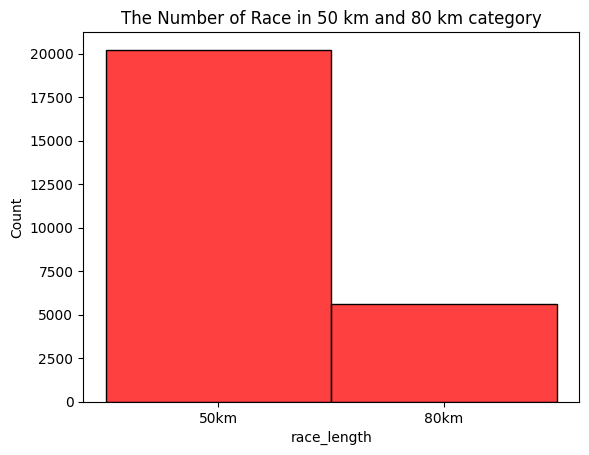

In [38]:
#The Number of Race in 50 km and 80 km category
sns.histplot(USA_UM['race_length'],color = 'red')
plt.title('The Number of Race in 50 km and 80 km category')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

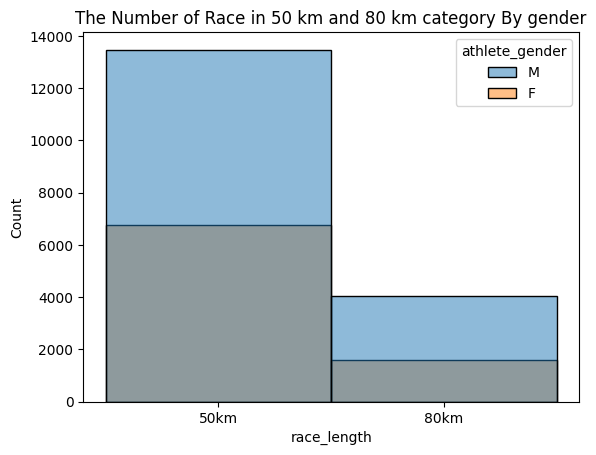

In [39]:
##The Number of Race in 50 km and 80 km category by gender
sns.histplot(USA_UM,  x= 'race_length', hue = 'athlete_gender',palette = 'tab10')
plt.title('The Number of Race in 50 km and 80 km category By gender')
plt.show()

/tmp/ipykernel_18/605549183.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(USA_UM[USA_UM['race_length']=='80km']['athlete_average_speed'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='athlete_average_speed', ylabel='Density'>

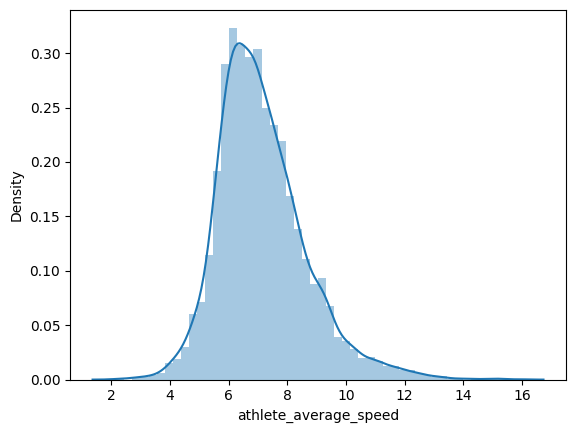

In [40]:
sns.distplot(USA_UM[USA_UM['race_length']=='80km']['athlete_average_speed'])

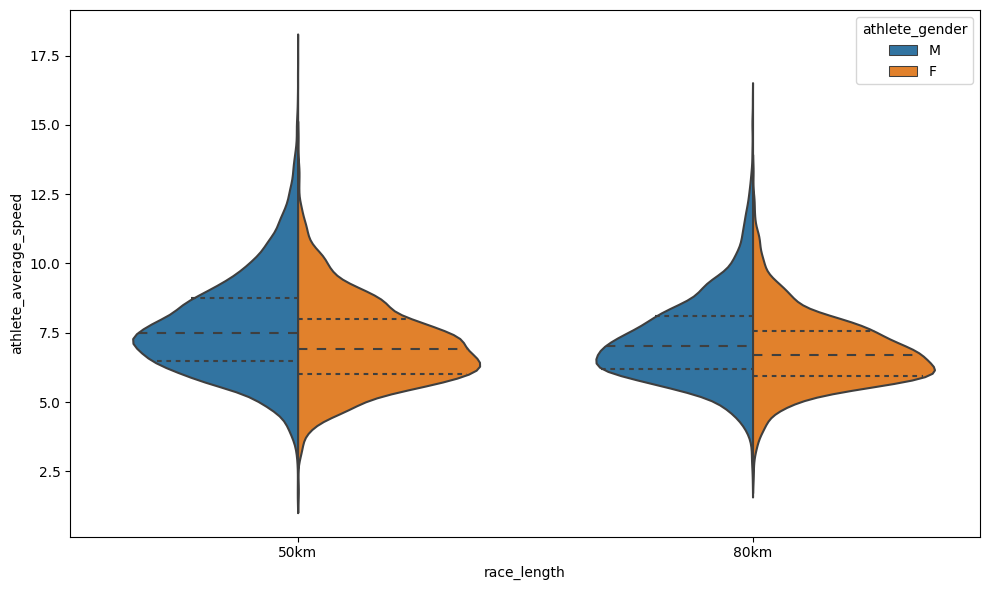

In [41]:
# the relationship between the length of the race and athlethe average speed
plt.figure(figsize=(10, 6))
sns.violinplot(data = USA_UM, x = 'race_length', y='athlete_average_speed', hue = 'athlete_gender', split = True, inner='quartz')
plt.tight_layout()

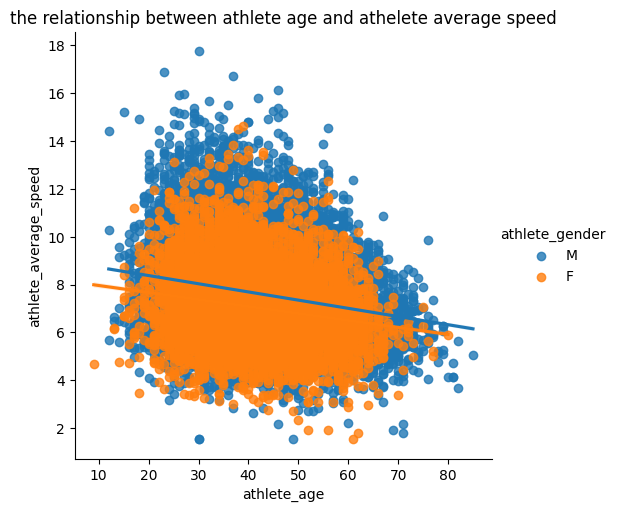

In [42]:
# the relationship between athlete age and athelete average speed 
sns.lmplot(data=USA_UM, x='athlete_age', y='athlete_average_speed', hue = 'athlete_gender',palette = 'tab10')
plt.title('the relationship between athlete age and athelete average speed',fontsize = 12)
plt.show()

In [43]:
#difference in speed of Male/Females
usa = USA_UM.groupby(['race_length','athlete_gender'])['athlete_average_speed'].mean()
usa

race_length  athlete_gender
50km         F                 7.083011
             M                 7.738985
80km         F                 6.834371
             M                 7.257633
Name: athlete_average_speed, dtype: float64

In [44]:
# swetching the series to data frame 
data = {
    'race_length' : usa.index.get_level_values('race_length'),
    'athlete_gender' : usa.index.get_level_values('athlete_gender'),
    'athlete_average_speed' : usa.values
    
}

usa1 = pd.DataFrame(data = data)
usa1

,race_length,athlete_gender,athlete_average_speed
0,50km,F,7.083011
1,50km,M,7.738985
2,80km,F,6.834371
3,80km,M,7.257633


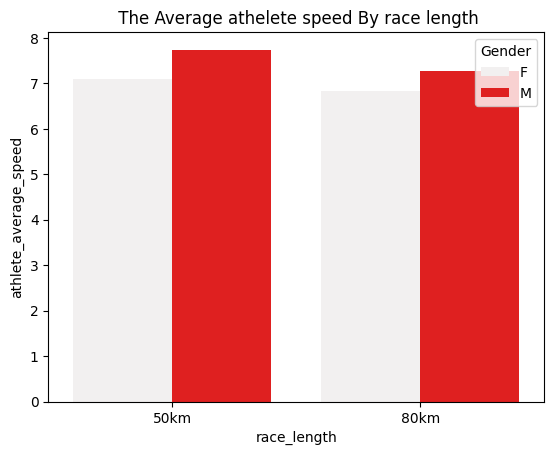

In [45]:
sns.barplot(data = usa1,x = 'race_length' , y = 'athlete_average_speed', hue = 'athlete_gender',color = 'red')
plt.legend(title="Gender", loc="upper right")
plt.title(' The Average athelete speed By race length', color = 'black')
plt.show()


In [46]:
#what age groups are best in the 80 km race
usa3 = USA_UM.query('race_length == "80km"').groupby('athlete_age')['athlete_average_speed'].agg(['mean','count']).sort_values(by = 'mean', ascending = False).query('count > 19').head(10)
usa3

,mean,count
athlete_age,,
29,7.902252,135
23,7.779800,55
28,7.575252,107
30,7.569204,157
25,7.540923,91
31,7.451638,138
38,7.430022,231
35,7.422359,195
36,7.403854,185


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


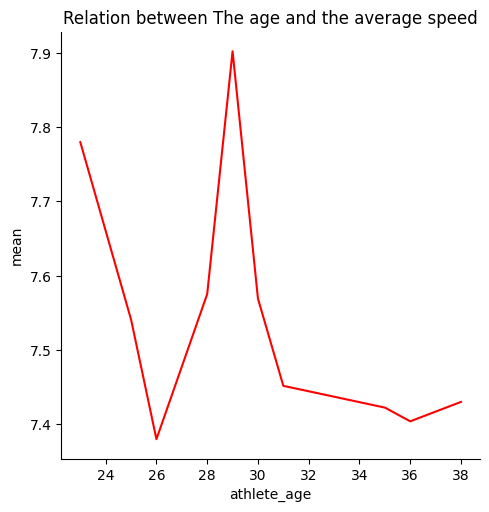

In [47]:
sns.relplot(data = usa3 , x = 'athlete_age' ,y = 'mean',kind = 'line',color = 'red')
plt.ylabel = 'Average speed'
plt.title('Relation between The age and the average speed')
plt.show()

In [48]:
#what age groups are worst in the 80 km race
usa4 = USA_UM.query('race_length == "80km"').groupby('athlete_age')['athlete_average_speed'].agg(['mean','count']).sort_values('mean', ascending = True).query('count> 19').head(10)
usa4

,mean,count
athlete_age,,
60,6.261788,33
62,6.272730,37
61,6.358355,31
63,6.514806,31
58,6.582328,67
64,6.620727,22
50,6.671541,172
59,6.672072,83
48,6.696853,136


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


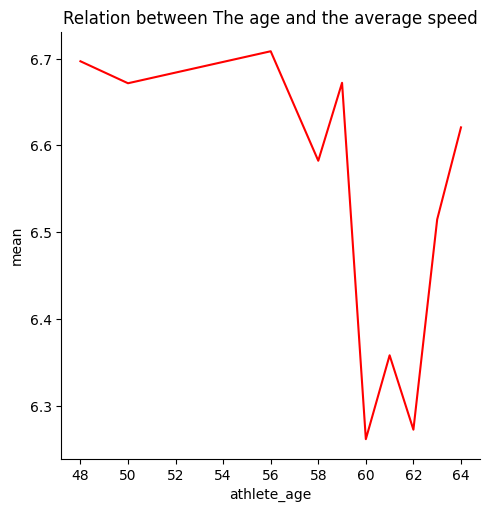

In [49]:
sns.relplot(data = usa4 , x = 'athlete_age' ,y = 'mean',kind = 'line',color = 'red')
plt.ylabel = 'Average speed'
plt.title('Relation between The age and the average speed')
plt.show()

In [50]:
#Convert date type into the correct format. Currently its DD.MM.YYYY.
USA_UM['race_month'] = USA_UM['race_day'].str.split('.').str.get(1).astype(int)

In [51]:
# applying a lambda function to get the season of the event
USA_UM['race_season'] = USA_UM['race_month'].apply(lambda x: 'Winter' if x > 11 else 'Fall' if x > 8 else 'Summer' if x > 5 else 'Spring' if x > 2 else 'Winter') 

In [52]:
USA_UM.head()

,year,race_day,race_name,Event distance/length,race_number_of_finishers,athlete_performance,athlete_gender,athlete_age_category,athlete_average_speed,athlete_id,athlete_age,race_length,Average athlete_age,race_month,race_season
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,M23,15.158,71287,29,50km,29.0,2,Winter
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,M35,12.369,629508,39,50km,39.0,2,Winter
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,MU23,12.099,64838,21,50km,21.0,2,Winter
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,M35,11.449,704450,37,50km,37.0,2,Winter
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,M40,11.212,810281,43,50km,43.0,2,Winter


In [53]:
#comparing the average speed by season
usa5 = USA_UM.groupby('race_season')['athlete_average_speed'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
usa5

,mean,count
race_season,,
Spring,7.684430,3294
Winter,7.518187,11595
Fall,7.406619,8315
Summer,6.869336,2653


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


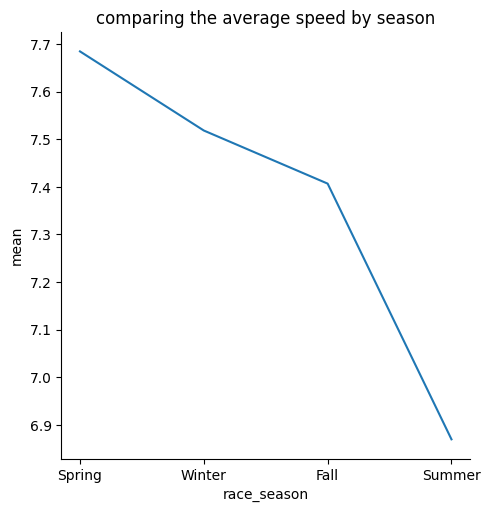

In [54]:
sns.relplot(data = usa5 , x = 'race_season' , y = 'mean',kind = 'line' )
plt.title('comparing the average speed by season')
plt.show()

In [55]:
#look at only 80km
usa6 = USA_UM.query('race_length == "80km"').groupby('race_season')['athlete_average_speed'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
usa6

,mean,count
race_season,,
Fall,7.511585,1997
Spring,7.082557,836
Winter,7.048442,1977
Summer,6.505776,817


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


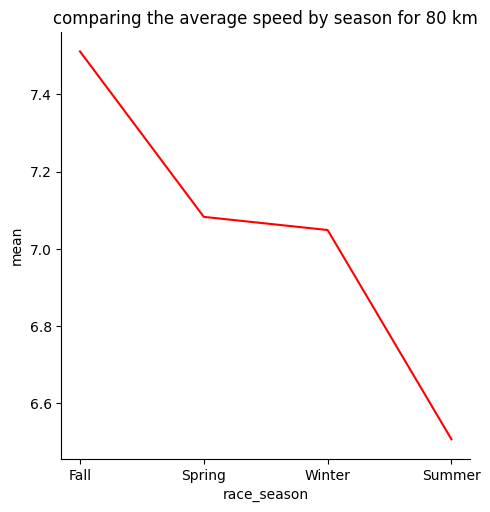

In [56]:
sns.relplot(data = usa6 , x = 'race_season' , y = 'mean',kind = 'line', color = 'red' )
plt.title('comparing the average speed by season for 80 km')
plt.show()